# Что такое регрессия?

Задача предсказания непрерывной целевой переменной.
Примеры: предсказание цены дома, температуры, дохода и т.д.

Линейная регрессия:  
$$ y = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n = \mathbf{w}^T \mathbf{x} $$  
где $\mathbf{w} = \begin{bmatrix} w_0 \\ w_1 \\ \vdots \\ w_n \end{bmatrix}$ — вектор весов,
$\mathbf{x} = \begin{bmatrix} 1 \\ x_1 \\ \vdots \\ x_n \end{bmatrix}$ — вектор признаков (с $x_0 = 1$).

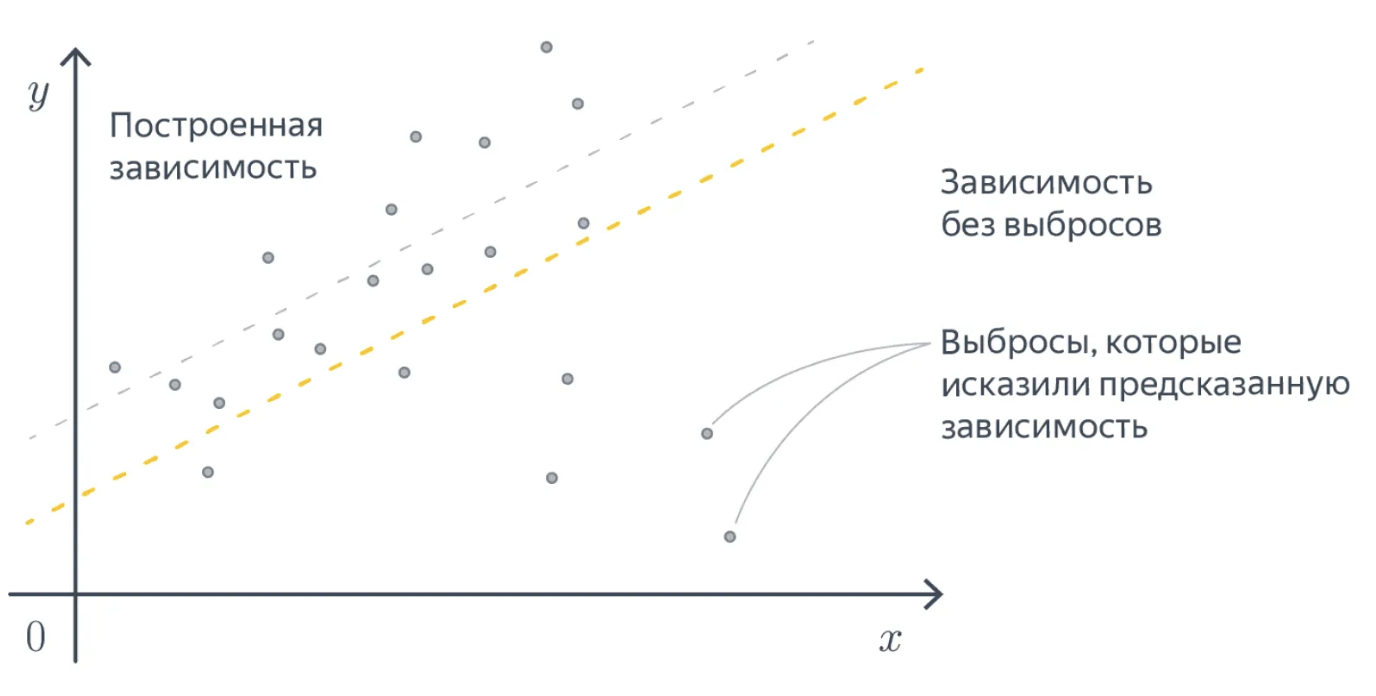

### Функция потерь — MSE (Mean Squared Error)

$$
J(\mathbf{w}) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_{\mathbf{w}}(\mathbf{x}^{(i)}) - y^{(i)} \right)^2
$$

где:
- $m$ — количество обучающих примеров,
- $h_{\mathbf{w}}(\mathbf{x}^{(i)})$ — предсказание модели для $i$-го примера,
- $y^{(i)}$ — истинное значение.

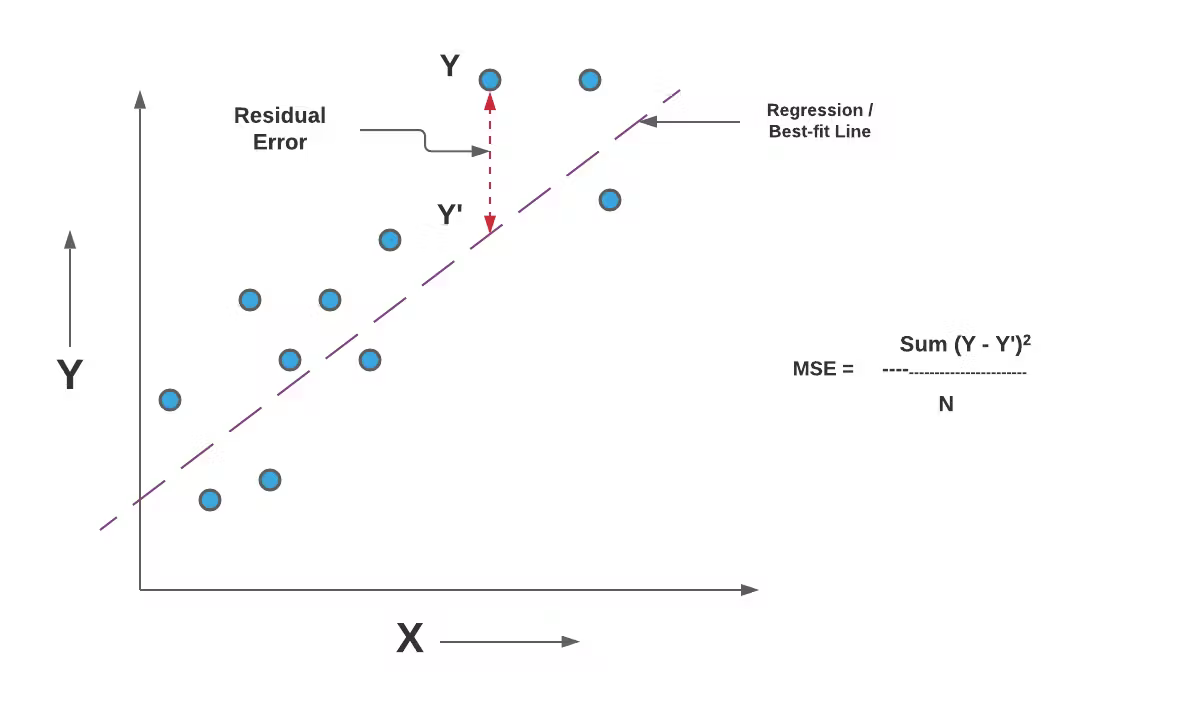

# Метод наименьших квадратов (аналитическое решение)

$$
\mathbf{w} = (X^T X)^{-1} X^T y
$$

Мы хотим минимизировать функцию потерь — сумму квадратов отклонений:

$$
\mathcal{L}(\mathbf{w}) = \|X\mathbf{w} - \mathbf{y}\|^2 = (X\mathbf{w} - \mathbf{y})^T (X\mathbf{w} - \mathbf{y})
$$

Раскроем скобки:

$$
\mathcal{L}(\mathbf{w}) = \mathbf{w}^T X^T X \mathbf{w} - 2\mathbf{y}^T X \mathbf{w} + \mathbf{y}^T \mathbf{y}
$$

Возьмём производную по вектору $\mathbf{w}$:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = 2X^T X \mathbf{w} - 2X^T \mathbf{y}
$$

Приравняем производную к нулю:

$$
2X^T X \mathbf{w} - 2X^T \mathbf{y} = 0
\quad \Rightarrow \quad
X^T X \mathbf{w} = X^T \mathbf{y}
$$

Если матрица $X^T X$ обратима, то решение:

$$
\boxed{\mathbf{w} = (X^T X)^{-1} X^T \mathbf{y}}
$$

**Плюсы:**
- Точное решение.

**Минусы:**
- Вычислительно дорого при большом количестве признаков $n$ — сложность $O(n^3)$ из-за обращения матрицы.
- Требует, чтобы матрица $X^T X$ была **обратима** (невырожденной).

**Альтернатива:** Градиентный спуск.

# Градиентный спуск (Gradient Descent)

Градиентный спуск — это **итеративный метод оптимизации**, используемый для нахождения минимума функции потерь $J(\mathbf{w})$.  
Вместо аналитического решения (нормального уравнения), мы **постепенно подбираем веса $\mathbf{w}$**, двигаясь в направлении наискорейшего убывания функции.

---

## Интуиция

Представьте, что вы находитесь на склоне горы в тумане и хотите спуститься вниз.  
Вы не видите всю гору, но можете оценить, в каком направлении земля идёт "вниз" прямо под ногами — это и есть **градиент**.  
Сделав шаг в этом направлении, вы снова оцениваете наклон — и так до тех пор, пока не окажетесь в низине (локальном минимуме).


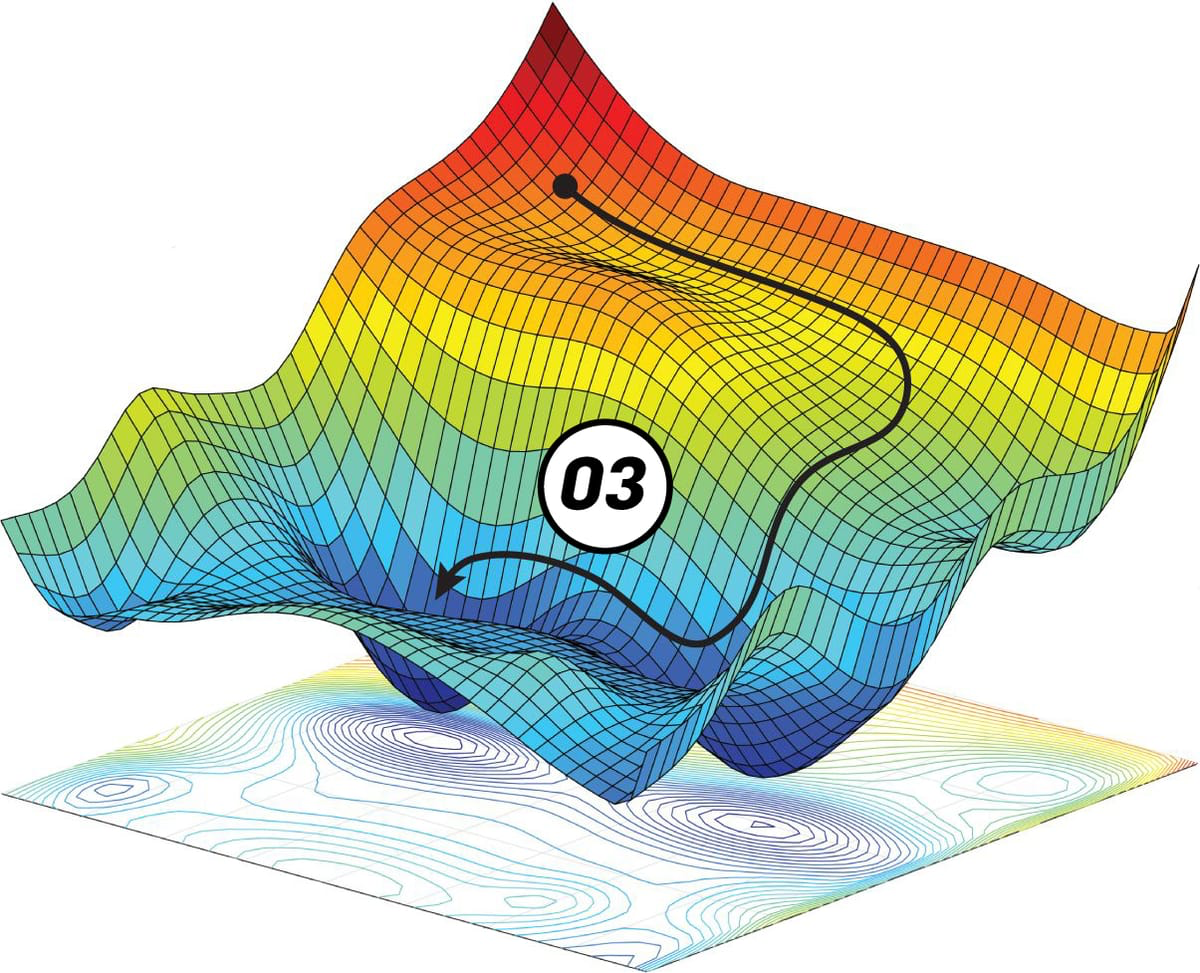

## Формула обновления весов

Для каждого веса $w_j$ обновление происходит по правилу:

$$
w_j := w_j - \alpha \cdot \frac{\partial J(\mathbf{w})}{\partial w_j}
$$

где:
- $\alpha$ — **скорость обучения (learning rate)** — размер шага,
- $\frac{\partial J}{\partial w_j}$ — **частная производная функции потерь по $w_j$** — указывает направление роста ошибки.

или в **векторной** форме:

$$
\mathbf{w} := \mathbf{w} - \alpha \cdot \nabla J(\mathbf{w})
$$

где:
- $\mathbf{w} = \begin{bmatrix} w_0 \\ w_1 \\ \vdots \\ w_n \end{bmatrix}$ — вектор весов,
- $\nabla J(\mathbf{w}) = \begin{bmatrix} \frac{\partial J}{\partial w_0} \\ \frac{\partial J}{\partial w_1} \\ \vdots \\ \frac{\partial J}{\partial w_n} \end{bmatrix}$ — **градиент** функции потерь (вектор частных производных),
- $\alpha$ — скорость обучения.

---

## Что такое частная производная функции потерь по $w_j$?

Частная производная $ \frac{\partial J(\mathbf{w})}{\partial w_j} $ — это **скорость изменения функции потерь $J$ при изменении веса $w_j$**, при условии, что все остальные веса ($w_0, w_1, ..., w_{j-1}, w_{j+1}, ..., w_n$) остаются неизменными.

---

### Геометрическая интерпретация

Представь, что функция потерь $J(\mathbf{w})$ — это **поверхность в многомерном пространстве**, где по осям отложены веса $w_0, w_1, ..., w_n$, а по высоте — значение ошибки.

Тогда:
- $ \frac{\partial J}{\partial w_j} $ — это **наклон поверхности ошибки** вдоль оси $w_j$ в текущей точке.
- Если производная **положительна** → функция растёт при увеличении $w_j$ → чтобы уменьшить ошибку, нужно **уменьшить $w_j$**.
- Если производная **отрицательна** → функция убывает при увеличении $w_j$ → чтобы уменьшить ошибку, нужно **увеличить $w_j$**.

Таким образом, **знак производной говорит нам, в какую сторону двигать вес, чтобы уменьшить ошибку**.

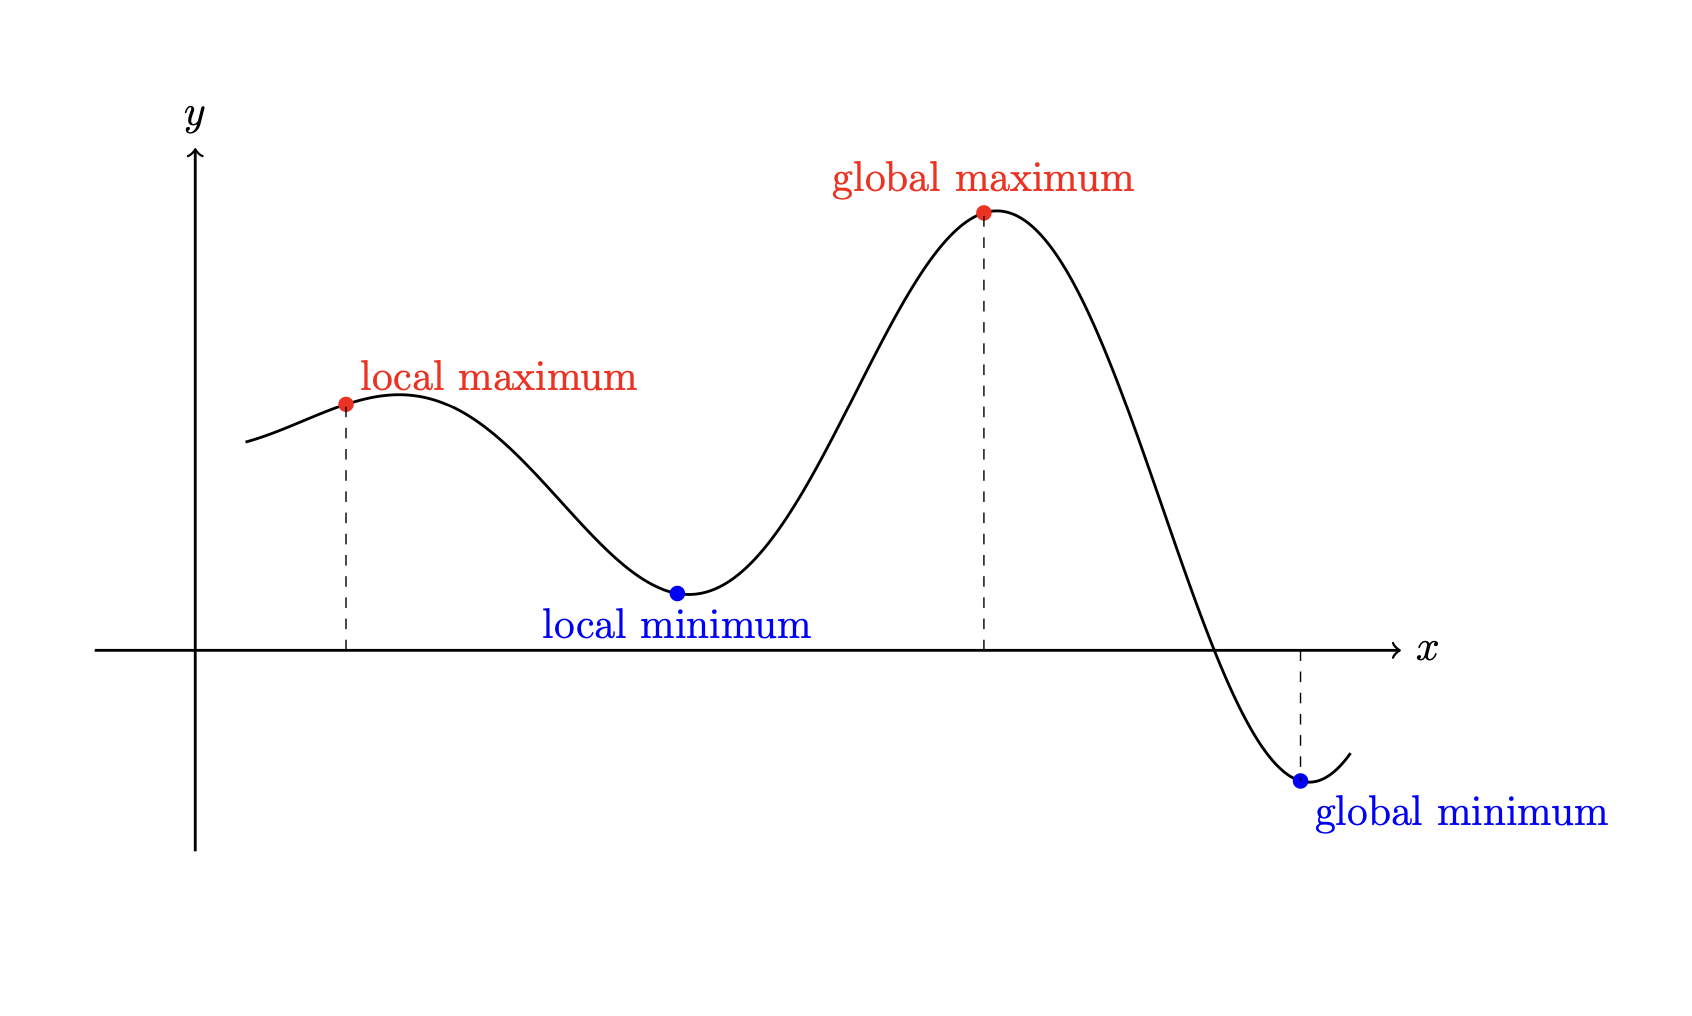


## Подставим производную MSE

Напомним, функция потерь:

$$
J(\mathbf{w}) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_{\mathbf{w}}(\mathbf{x}^{(i)}) - y^{(i)} \right)^2, \quad \text{где } h_{\mathbf{w}}(\mathbf{x}) = \mathbf{w}^T \mathbf{x}
$$

Берём производную по $w_j$:

$$
\frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_{\mathbf{w}}(\mathbf{x}^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)}
$$

Обрати внимание: множитель $\frac{1}{2}$ сократился с двойкой от производной квадрата — именно для этого он и был добавлен!

---

## Итоговая формула обновления:

$$
w_j := w_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h_{\mathbf{w}}(\mathbf{x}^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)}
$$

или в векторной форме (для всех весов сразу):

$$
\mathbf{w} := \mathbf{w} - \alpha \cdot \frac{1}{m} X^T (X\mathbf{w} - \mathbf{y})
$$




---

## Параметры и важные моменты

**Скорость обучения $\alpha$**:
- Слишком большая → можем "перепрыгнуть" минимум, алгоритм расходится.
- Слишком маленькая → сходимость очень медленная.
- Часто подбирается экспериментально: `0.001`, `0.01`, `0.1`, `1.0`...

**Итеративный процесс**:
- Выполняется `n_iterations` раз или пока изменение весов/ошибки не станет меньше порога.

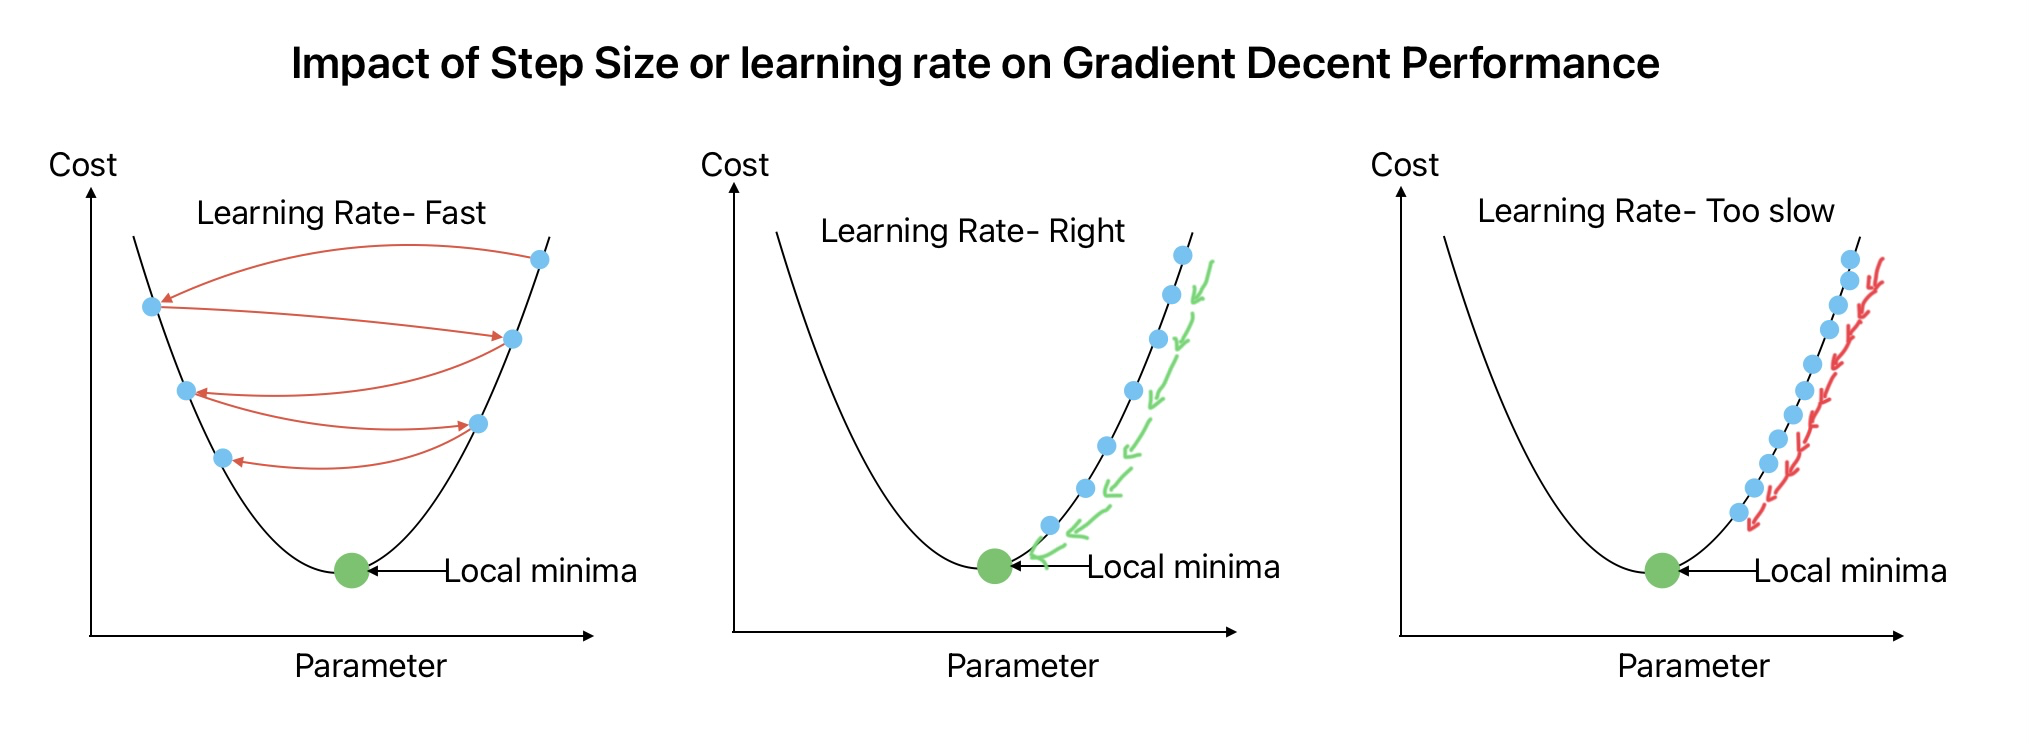
**Масштабирование признаков (стандартизация/нормализация)**:
- Если признаки имеют разные масштабы (например, `площадь квартиры = 50 м²`, а `количество комнат = 2`), градиент будет "тянуть" сильнее по признакам с большими числами.
- Это замедляет сходимость и может привести к нестабильности.
- Решение: **стандартизация** — привести каждый признак к среднему 0 и стандартному отклонению 1:

$$
x_j^{(i)} \leftarrow \frac{x_j^{(i)} - \mu_j}{\sigma_j}
$$


## Виды градиентного спуска

| Тип | Описание | Плюсы | Минусы |
|-----|----------|-------|--------|
| **Batch GD** | Использует **все** $m$ примеров на каждой итерации | Стабильная сходимость | Медленно на больших данных |
| **Stochastic GD (SGD)** | Использует **один случайный** пример на итерацию | Быстро, подходит для онлайн-обучения | Шумная траектория, может не сойтись точно |
| **Mini-batch GD** | Использует **небольшую подвыборку** (например, 32, 64, 128) | Баланс скорости и стабильности | Наиболее популярен на практике |

---
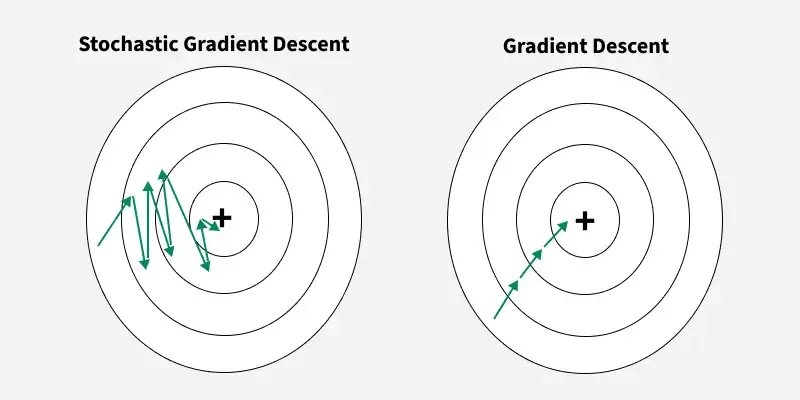

# Задачи

## Задача: Вывод градиента функции потерь вручную

Пусть модель линейной регрессии задана как:  
$$
h_{\mathbf{w}}(x) = w_0 + w_1 x
$$

И даны три обучающих примера:  
$$
(x^{(1)}, y^{(1)}) = (1, 2), \quad (x^{(2)}, y^{(2)}) = (2, 3), \quad (x^{(3)}, y^{(3)}) = (3, 5)
$$

Функция потерь — среднеквадратичная ошибка (MSE):  
$$
J(w_0, w_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_{\mathbf{w}}(x^{(i)}) - y^{(i)} \right)^2
$$

---

### Задание:

1. Подставьте данные в формулу и запишите $J(w_0, w_1)$ в явном виде.  
2. Найдите частные производные в **символьном виде**:  
   $$
   \frac{\partial J}{\partial w_0} = \, ? \quad \text{и} \quad \frac{\partial J}{\partial w_1} = \, ?
   $$

## Почему обычная линейная регрессия иногда не работает

Напомним, обычная линейная регрессия минимизирует MSE:

$$
J(\mathbf{w}) = \frac{1}{2n} \sum_{i=1}^{n} \left( h_{\mathbf{w}}(\mathbf{x}^{(i)}) - y^{(i)} \right)^2, \quad \text{где } h_{\mathbf{w}}(\mathbf{x}) = \mathbf{w}^T \mathbf{x}
$$

Аналитическое решение:

$$
\mathbf{w} = (X^T X)^{-1} X^T \mathbf{y}
$$

Но это решение может быть плохим на практике, если:

- Признаков много, а наблюдений мало ($p \gg n$) → бесконечно много решений.
- Признаки сильно коррелируют (мультиколлинеарность) → $X^T X$ почти вырождена → $(X^T X)^{-1}$ нестабильна → веса "взрываются".
- В данных есть шум → модель подстраивается под него → переобучение.
- Коэффициенты становятся слишком большими → модель чувствительна к малейшим изменениям входов.

Цель регуляризации: добавить "здравый смысл" в модель — не позволять весам быть слишком большими, даже если это уменьшает ошибку на обучающих данных.
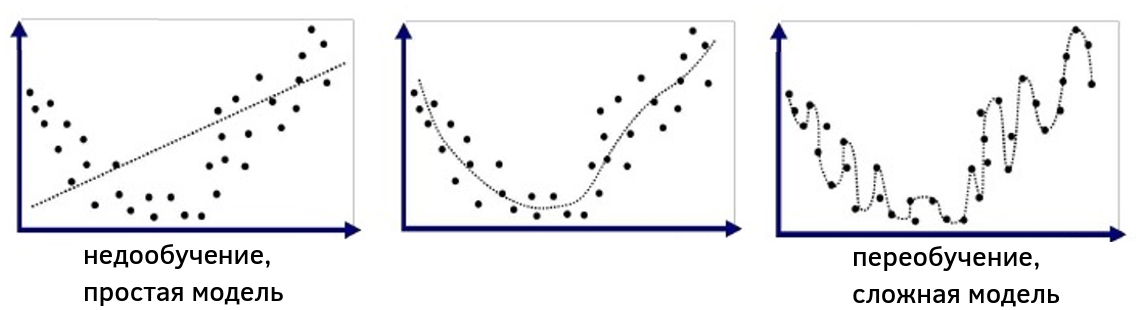

## Добавляем штраф за большие веса


Модифицируем функцию потерь — добавляем регуляризационный член:

$$
J_{\text{рег}}(\mathbf{w}) = \underbrace{\frac{1}{2n} \sum_{i=1}^{n} \left( h_{\mathbf{w}}(\mathbf{x}^{(i)}) - y^{(i)} \right)^2}_{\text{MSE}} + \underbrace{\lambda \cdot R(\mathbf{w})}_{\text{штраф}}
$$

где:
- $\lambda \geq 0$ — параметр силы регуляризации (чем больше — тем сильнее штраф),
- $R(\mathbf{w})$ — функция штрафа (зависит от метода: L2, L1 и т.д.).

Интуиция: мы платим "цену" за сложность модели. Чтобы уменьшить общий $J_{\text{рег}}$, модель вынуждена искать компромисс: чуть хуже подогнать данные, но сильно уменьшить веса.

Важно: обычно не штрафуют свободный член $w_0$ (смещение), так как он не связан с признаками.
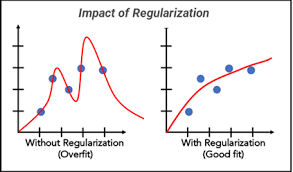

## Ridge-регрессия: штрафуем сумму квадратов весов

Функция потерь с L2-регуляризацией:

$$
J_{\text{Ridge}}(\mathbf{w}) = \frac{1}{2n} \sum_{i=1}^{n} \left( h_{\mathbf{w}}(\mathbf{x}^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^{p} w_j^2
$$

(Здесь $j$ идёт от 1 до $p$, то есть штрафуется только $w_1, ..., w_p$, а $w_0$ остаётся без штрафа.)

Аналитическое решение:

$$
\mathbf{w}_{\text{Ridge}} = (X^T X + \lambda I)^{-1} X^T \mathbf{y}
$$

Что даёт $\lambda I$?
Добавление $\lambda$ к диагонали матрицы $X^T X$ делает её строго положительно определённой → обратная матрица существует и устойчива → веса не "взрываются".

Эффект: все коэффициенты уменьшаются (сжимаются к нулю), но никогда не обнуляются → нет отбора признаков, но есть стабилизация.

## Lasso-регрессия: штрафуем сумму модулей весов

Функция потерь с L1-регуляризацией:

$$
J_{\text{Lasso}}(\mathbf{w}) = \frac{1}{2n} \sum_{i=1}^{n} \left( h_{\mathbf{w}}(\mathbf{x}^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^{p} |w_j|
$$

Из-за модуля $|w_j|$ функция не всюду дифференцируема → используется численная оптимизация.

Главное свойство: L1-штраф способен точно обнулить некоторые коэффициенты → автоматический отбор признаков.

Интуиция: в геометрической интерпретации L1-шар (ромб) имеет "острые углы" → решение часто попадает точно в ноль.  
L2-шар (круг) — гладкий → решение редко бывает нулевым.

Полезно, когда: признаков много, а истинных — мало. Lasso "выключит" лишние.

## Elastic Net: комбинируем L1 и L2

Функция потерь:

$$
J_{\text{ElasticNet}}(\mathbf{w}) = \frac{1}{2n} \sum_{i=1}^{n} \left( h_{\mathbf{w}}(\mathbf{x}^{(i)}) - y^{(i)} \right)^2 + \lambda \left( \alpha \sum_{j=1}^{p} |w_j| + (1 - \alpha) \sum_{j=1}^{p} w_j^2 \right)
$$

где:
- $\lambda$ — общая сила регуляризации,
- $\alpha \in [0,1]$ — баланс между L1 и L2:
  - $\alpha = 1$ → Lasso,
  - $\alpha = 0$ → Ridge.

Преимущества:
- Может обнулять коэффициенты (как Lasso),
- Устойчив к группам коррелирующих признаков (как Ridge) — не выбирает "случайный" признак из группы, а включает/исключает всю группу.

Когда использовать: если признаков много, они коррелируют, и нужно отбирать группы.

## Как выбрать $\lambda$?

Параметр $\lambda$ контролирует силу регуляризации:

- $\lambda = 0$ → обычная линейная регрессия (риск переобучения),
- $\lambda \to \infty$ → все веса стремятся к 0 → недообучение.

Оптимальный $\lambda$ выбирают по кросс-валидации:

1. Берём сетку значений: $\lambda = [10^{-4}, 10^{-3}, ..., 10^2, 10^3, ...]$
2. Для каждого $\lambda$ обучаем модель и считаем ошибку на валидационной выборке (или через k-fold CV).
3. Выбираем $\lambda$, при котором ошибка минимальна.

Важно: всегда стандартизируйте признаки перед регуляризацией!

$$
x_j^{(i)} \leftarrow \frac{x_j^{(i)} - \mu_j}{\sigma_j}
$$

Иначе признаки в разных масштабах будут несправедливо штрафоваться — например, признак в метрах будет штрафоваться слабее, чем в миллиметрах.

## Регуляризация — это компромисс

Регуляризация намеренно увеличивает смещение (bias), чтобы сильно уменьшить дисперсию (variance).

Напомним разложение ошибки:

$$
\text{Ошибка} = \text{смещение}^2 + \text{дисперсия (разброс)} + \text{неустранимая ошибка (шум)}
$$

Без регуляризации:
- Смещение ↓, дисперсия ↑ → переобучение.

С регуляризацией:
- Смещение ↑ (немного), дисперсия ↓↓ → ошибка на новых данных ↓.

Итог: регуляризация — не "улучшение", а разумный компромисс между точностью на обучающих данных и устойчивостью на новых.

Выбор метода:
- Ridge — если важна стабильность и есть мультиколлинеарность.
- Lasso — если нужно отобрать признаки.
- Elastic Net — если и то, и другое.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = fetch_california_housing(as_frame=True)
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
sgd = SGDRegressor(
    loss='squared_error',
    learning_rate='constant',
    eta0=0.00001,
    max_iter=5000,
    random_state=42,
    validation_fraction=0.1
)

sgd.fit(X_train_scaled, y_train)
y_pred = sgd.predict(X_test_scaled)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R²: {r2_score(y_test, y_pred):.3f}")

RMSE: 0.769
R²: 0.548


RMSE на трейне: 0.805
RMSE на тесте: 0.805
RMSE на трейне: 0.756
RMSE на тесте: 0.756
RMSE на трейне: 0.722
RMSE на тесте: 0.722
RMSE на трейне: 73030.626
RMSE на тесте: 73030.626
RMSE на трейне: 21297433930.078
RMSE на тесте: 21297433930.078
RMSE на трейне: 132358831137.367
RMSE на тесте: 132358831137.367
RMSE на трейне: 378302414935.325
RMSE на тесте: 378302414935.325
RMSE на трейне: 2093105606081.068
RMSE на тесте: 2093105606081.068


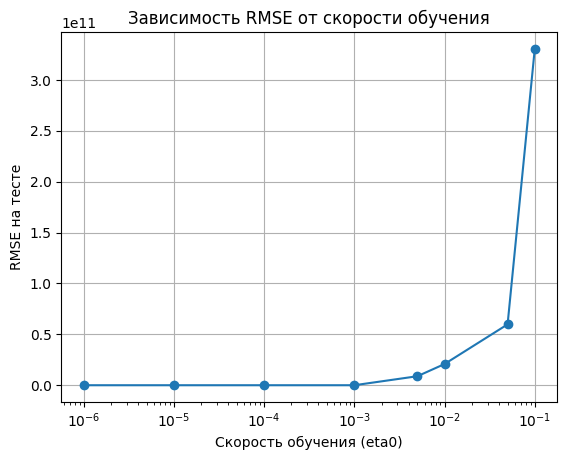

In [4]:
learning_rates = [0.000001, 0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]
rmse_scores = []

for lr in learning_rates:
    model = SGDRegressor(
        loss='squared_error',
        learning_rate='constant',
        eta0=lr,
        max_iter=1000,
        random_state=42,
        early_stopping=True
    )
    model.fit(X_train_scaled, y_train)
    pred_train = model.predict(X_train_scaled)
    rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
    print(f"RMSE на трейне: {rmse_train:.3f}")
    pred = model.predict(X_test_scaled)
    rmse_test = np.sqrt(mean_squared_error(y_test, pred))
    rmse_scores.append(rmse_test)
    print(f"RMSE на тесте: {rmse_train:.3f}")

plt.plot(learning_rates, rmse_scores, marker='o')
plt.xscale('log')
plt.xlabel('Скорость обучения (eta0)')
plt.ylabel('RMSE на тесте')
plt.title('Зависимость RMSE от скорости обучения')
plt.grid(True)
plt.show()

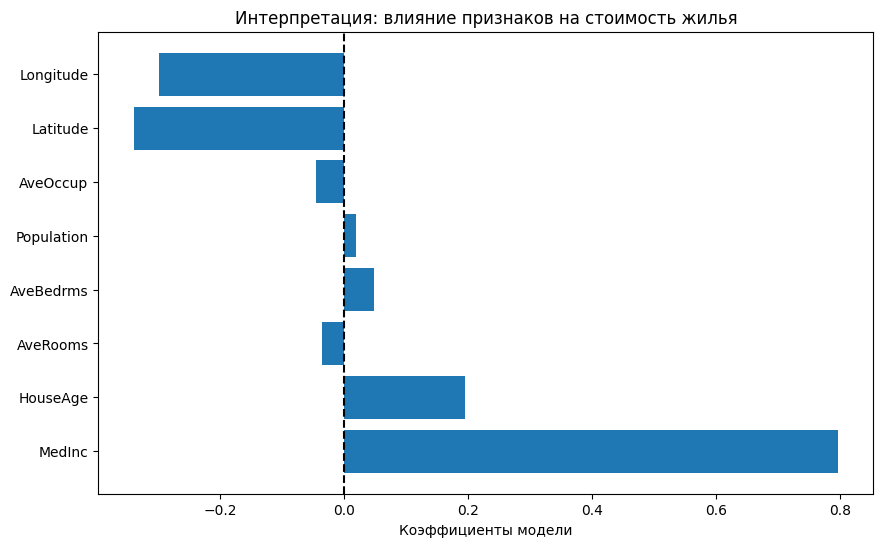

In [7]:
feature_names = X.columns
coef = sgd.coef_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coef)
plt.xlabel('Коэффициенты модели')
plt.title('Интерпретация: влияние признаков на стоимость жилья')
plt.axvline(0, color='k', linestyle='--')
plt.show()

In [8]:
models = {
    'classic': SGDRegressor(loss='squared_error', learning_rate='constant', eta0=0.00001, max_iter=1000, random_state=42, early_stopping=True),
    'Ridge (L2)': Ridge(alpha=1.0),
    'Lasso (L1)': Lasso(alpha=0.1, max_iter=5000),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=5000)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    results[name] = {'RMSE': rmse, 'R²': r2, 'coef': model.coef_}
    print(f"{name} → RMSE: {rmse:.3f}, R²: {r2:.3f}")

classic → RMSE: 0.766, R²: 0.552
Ridge (L2) → RMSE: 0.746, R²: 0.576
Lasso (L1) → RMSE: 0.824, R²: 0.481
ElasticNet → RMSE: 0.797, R²: 0.515


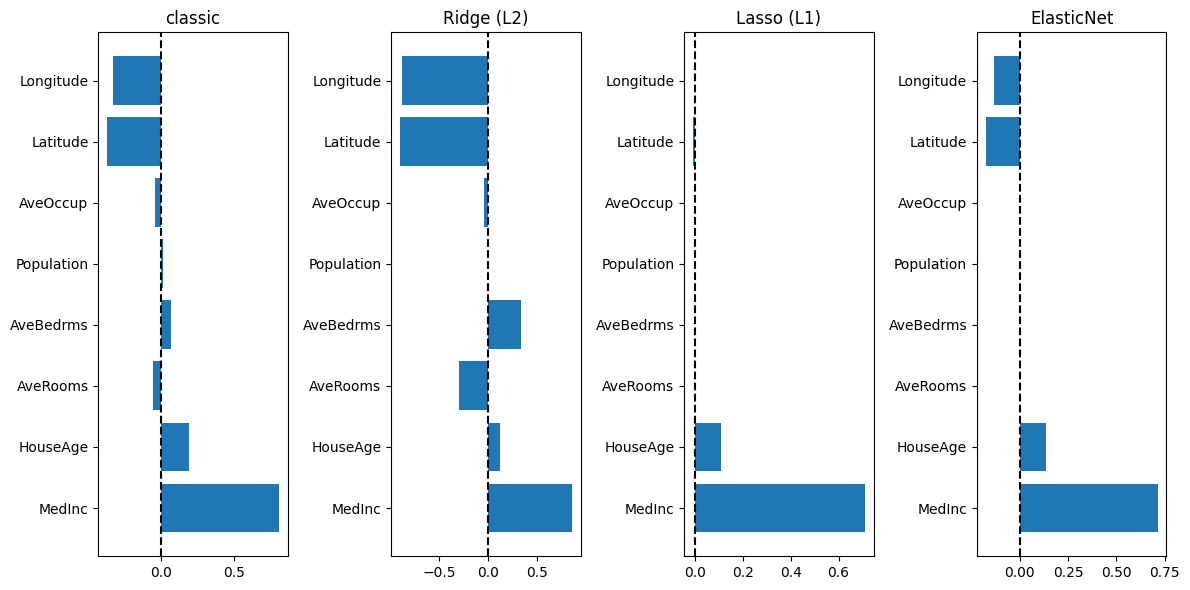

In [9]:
plt.figure(figsize=(12, 6))
for i, (name, res) in enumerate(results.items()):
    plt.subplot(1, 4, i+1)
    plt.barh(feature_names, res['coef'])
    plt.title(name)
    plt.axvline(0, color='k', linestyle='--')
plt.tight_layout()
plt.show()

In [10]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

elastic = ElasticNet(max_iter=5000)
grid = GridSearchCV(elastic, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train_scaled, y_train)

print("Лучшие параметры:", grid.best_params_)
print("Лучший RMSE (CV):", -grid.best_score_)

y_pred_best = grid.predict(X_test_scaled)
print("Тестовый RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))

Лучшие параметры: {'alpha': 0.01, 'l1_ratio': 0.1}
Лучший RMSE (CV): 0.7219653715626223
Тестовый RMSE: 0.7429021059509155
